In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('medical_examination.csv')
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# Add 'overweight' column
df['height'] = df.height * 0.01
df['overweight'] = df.weight / (df.height**2)
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177


In [4]:
f = lambda x: 1 if x > 25 else 0
df['overweight'] = df['overweight'].apply(f)

In [5]:
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,0


##### Normalize the data by making 0 always good and 1 always bad. If the value of `cholesterol` or `gluc` is 1, make the value 0. If the value is more than 1, make the value 1. 

In [6]:
df['cholesterol'].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [7]:
df['gluc'].value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

In [8]:
f = lambda x: 0 if x == 1 else 1
df['cholesterol'] = df['cholesterol'].apply(f)
df['gluc'] = df['gluc'].apply(f)

In [9]:
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0


* Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's `catplot()`. The dataset should be split by 'Cardio' so there is one chart for each `cardio` value. The chart should look like `examples/Figure_1.png`.

In [9]:
df_fig1 = df[['cardio', 'active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']]
df_fig1.head(10)

,cardio,active,alco,cholesterol,gluc,overweight,smoke
0,0,1,0,0,0,0,0
1,1,1,0,1,0,1,0
2,1,0,0,1,0,0,0
3,1,1,0,0,0,1,0
4,0,0,0,0,0,0,0
5,0,0,0,1,1,1,0
6,0,1,0,1,0,1,0
7,1,1,0,1,1,1,0
8,0,1,0,0,0,1,0
9,0,0,0,0,0,1,0


In [10]:
grouped = df_fig1.groupby('cardio').sum()
grouped.head(5)

,active,alco,cholesterol,gluc,overweight,smoke
cardio,,,,,,
0,28643,1941,5691,4127,19106,3240
1,27618,1823,11924,6394,24440,2929


In [10]:
df1 = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
df1.head(10)

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
5,0,active,0
6,0,active,1
7,1,active,1
8,0,active,1
9,0,active,0


In [12]:
df0 = df_fig1[df_fig1.cardio == 0]
len(df0)

35021

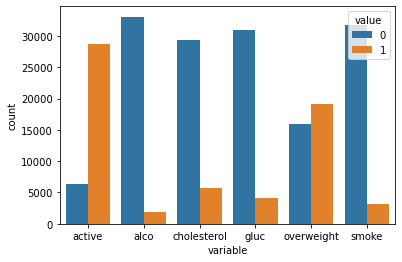

In [13]:
df0 = pd.melt(df0, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
g0 = sns.countplot(x="variable", hue='value', data= df0)

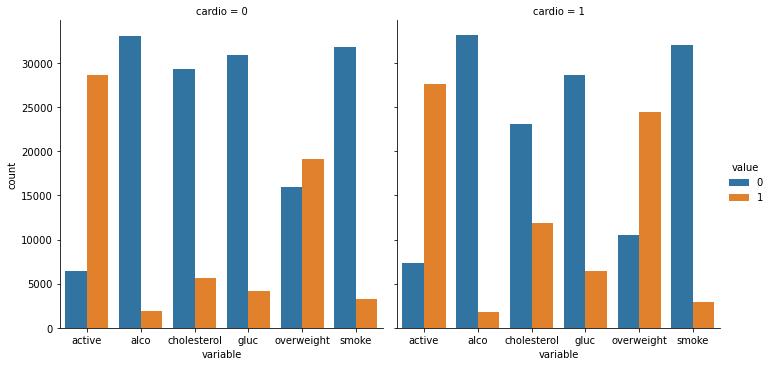

In [11]:
sns.catplot(data=df1, kind= 'count', x= 'variable', hue='value', col='cardio')

Clean the data. Filter out the following patient segments that represent incorrect data:
  - diastolic pressure is higher than systolic (Keep the correct data with `(df['ap_lo'] <= df['ap_hi'])`)
  - height is less than the 2.5th percentile (Keep the correct data with `(df['height'] >= df['height'].quantile(0.025))`)
  - height is more than the 97.5th percentile
  - weight is less than the 2.5th percentile
  - weight is more than the 97.5th percentile

In [30]:
df_clean = df[df.ap_lo <= df.ap_hi]

In [31]:
df_clean = df_clean[(df_clean.height < np.percentile(df_clean.height, 2.5)) | (df_clean.height > np.percentile(df_clean.height, 97.5))]

In [33]:
df_clean = df_clean[(df_clean.weight < np.percentile(df_clean.weight,2.5)) | (df_clean.weight > np.percentile(df_clean.weight,97.5))]

In [63]:
corr = df_clean.corr().round(2)
print(corr.iloc[0:5,0:5])

          id   age  gender  height  weight
id      1.00  0.09    0.08    0.12   -0.07
age     0.09  1.00   -0.29   -0.18   -0.25
gender  0.08 -0.29    1.00    0.74    0.62
height  0.12 -0.18    0.74    1.00    0.39
weight -0.07 -0.25    0.62    0.39    1.00


In [67]:
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
age,0.09,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
gender,0.08,-0.29,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
height,0.12,-0.18,0.74,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
weight,-0.07,-0.25,0.62,0.39,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ap_hi,0.01,0.01,0.39,0.22,0.59,nan,nan,nan,nan,nan,nan,nan,nan,nan
ap_lo,0.08,-0.03,0.41,0.21,0.55,0.79,nan,nan,nan,nan,nan,nan,nan,nan
cholesterol,0.18,-0.03,0.19,0.24,0.22,0.22,0.23,nan,nan,nan,nan,nan,nan,nan
gluc,0.09,0.04,0.14,0.16,0.24,0.17,0.13,0.33,nan,nan,nan,nan,nan,nan
smoke,-0.18,-0.08,0.35,0.21,0.29,0.21,0.30,0.15,0.18,nan,nan,nan,nan,nan


<AxesSubplot:>

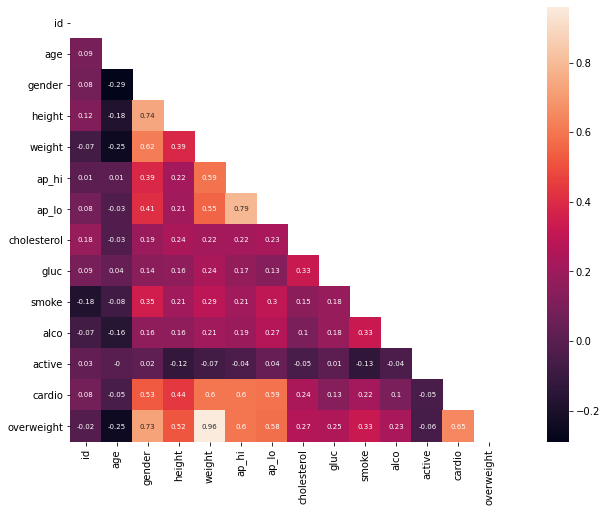

In [72]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(corr, mask=mask, square=True, annot = True, annot_kws={"size": 7})